<a href="https://colab.research.google.com/github/IanSkapin/DataAnalytics/blob/main/modeling-and-visualisation/regression-analysis/linear-models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Linear Models, Regression and Time Series

This notebook covers concepts covered in Topic 3

In [3]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


E.T.L

In [4]:
regression_analysis='https://github.com/IanSkapin/DataAnalytics/raw/main/modeling-and-visualisation/regression-analysis/'
df = pd.read_csv(regression_analysis + 'grades.csv')

In [5]:
df.shape

(1000, 3)

In [6]:
df.head()

,Student ID,Hours Studied,Grade
0,#25074,39,58.50
1,#25083,21,35.00
2,#25130,33,90.51
3,#25221,25,37.50
4,#25257,27,63.79


In [7]:
del df['Student ID']

In [8]:
df.describe()

,Hours Studied,Grade
count,1000.00000,1000.000000
mean,27.84000,60.978750
std,7.53121,20.435529
min,15.00000,20.000000
25%,21.00000,45.000000
50%,28.00000,59.100000
75%,35.00000,75.600000
max,40.00000,100.000000


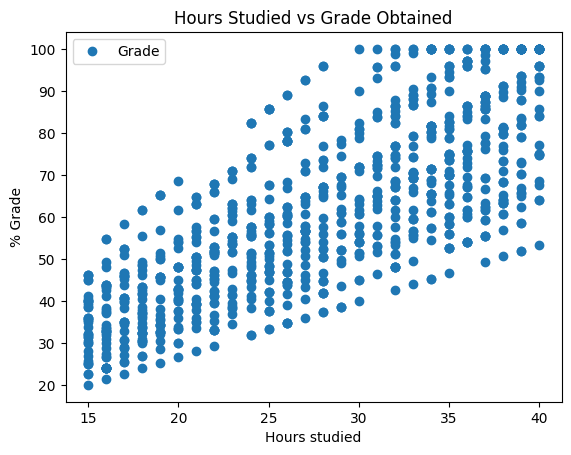

In [9]:
df.plot(x='Hours Studied',y='Grade', style='o')
plt.title('Hours Studied vs Grade Obtained')
plt.xlabel('Hours studied')
plt.ylabel('% Grade')
plt.show()

In [10]:
# We can check the correlation between the two

corr = df['Hours Studied'].corr(df['Grade'])
corr

0.7634104863174767

We can see there is a clear positive correlation between Hours Studied and Grade obtained.

We now split our data into features and labels - the feature here is 'Hours Studied' and the grades are data 'labels'

In [11]:
# extract the feature & label into arrays

X = df.iloc[:, :-1].values # hours studied
y = df.iloc[:, 1].values # grade

In [12]:
# Split data into training / test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [13]:
# Create a model instance

model = LinearRegression()

In [14]:
# Train the model

model.fit(X_train, y_train)

LinearRegression()

In [15]:
print('Intercept:', model.intercept_)
print('Coefficient:', model.coef_)

Intercept: 3.2961319097894943
Coefficient: [2.07944519]


In [16]:
# Make grade predictions

y_pred = model.predict(X_test)

In [17]:
# View predcitions

df_pred = pd.DataFrame({'Actual grade:': y_test, "Predicted:": y_pred})
df_pred

,Actual grade:,Predicted:
0,57.86,59.441152
1,35.00,46.964481
2,32.40,40.726145
3,97.20,78.156159
4,100.00,84.394494
...,...,...
195,31.50,34.487810
196,93.33,76.076714
197,50.63,65.679488
198,62.40,57.361707


We need to evaluate the performance of the algorithm.  How well does it do?

1. Mean Absolute Error
2. Mean Square Error
3. Root Mean Square Error

In [18]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 10.041253958305973
Mean Squared Error: 155.09023077275015
Root Mean Squared Error: 12.453522825801146


In [20]:
# 10% of the Mean Grade of All Students

df['Grade'].mean()*0.1

6.097875

Given a RMSE of 13.65 is more than the 10% of the Mean Score, this model isn't great, but if we visualise the data we can see quite a wide spread from the linear model which is describing the average relationship between Hours Studied and Grade obtained.

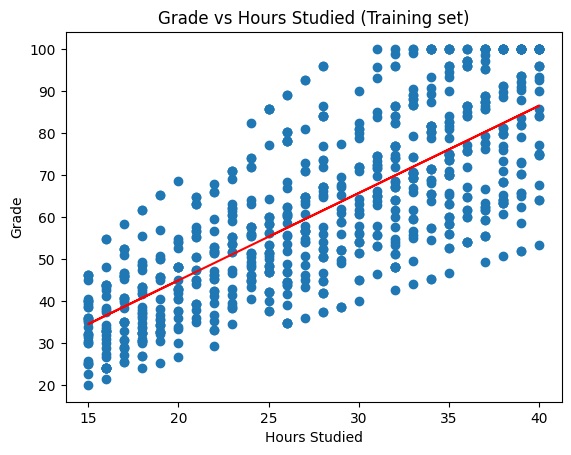

In [21]:
plt.scatter(X_train, y_train)
plt.plot(X_train, model.predict(X_train), color = "red")
plt.title("Grade vs Hours Studied (Training set)")
plt.xlabel("Hours Studied")
plt.ylabel("Grade")
plt.show()

In [22]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)
print('Adjusted R2_score:',(
    1-(1-r2_score(y_test, y_pred))*((len(X_test)-1)/(len(X_test)-len(X_test[0])-1))))

Adjusted R2_score: 0.5867202244720705


The Adjusted R2 - how much of the variability in grade is explained by number of hours studied?   About 55%

## Multiple Linear Regression

We now expand our data set to include several features, which we will map to our label - the grade.

This is more realistic of real life in which several factors influence a dependent variable.

We extend our grades dataset to include the following features:
* Number of Hours Studied
* Number of Hours Sleep the student reported having in the week prior to the exam
* The number of extention assignments the student completed
* The distance the student lives from campus

The label - Grade - remains the same.

We will now conduct a supervised machine learning analysis - in which we map the inputs (feature values) to the label (grade).  Remember we want to develop a model that captures the average relationship between the features and the label.

In [23]:
data = pd.read_csv(regression_analysis + 'grades_multi.csv')

In [24]:
print(data.shape)
data.head()

(1000, 6)


,Student ID,Hours Studied,Hours Sleep,Number of Assignments,Distance from College,Grade
0,#25074,39,40,5,2.14,58.50
1,#25083,21,47,3,7.54,35.00
2,#25130,33,61,8,20.82,90.51
3,#25221,25,25,4,0.45,37.50
4,#25257,27,50,6,2.53,63.79


In [25]:
# we can drop the 'Student ID' column

del data['Student ID']

In [26]:
# Inspect our data - EDA

data.describe()

,Hours Studied,Hours Sleep,Number of Assignments,Distance from College,Grade
count,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000
mean,27.84000,52.098000,5.503000,4.29492,60.978750
std,7.53121,15.699199,1.902527,6.86062,20.435529
min,15.00000,21.000000,2.000000,0.02000,20.000000
25%,21.00000,40.000000,4.000000,0.86000,45.000000
50%,28.00000,50.000000,5.000000,2.11000,59.100000
75%,35.00000,63.000000,7.000000,4.68750,75.600000
max,40.00000,105.000000,10.000000,108.04000,100.000000


In [27]:
corr = data.corr()
corr

,Hours Studied,Hours Sleep,Number of Assignments,Distance from College,Grade
Hours Studied,1.000000,-0.080297,0.738052,0.111626,0.763410
Hours Sleep,-0.080297,1.000000,0.376587,0.139683,0.394081
Number of Assignments,0.738052,0.376587,1.000000,0.186776,0.969937
Distance from College,0.111626,0.139683,0.186776,1.000000,0.200355
Grade,0.763410,0.394081,0.969937,0.200355,1.000000


Read the bottom row of the correlation matrix to get a feel for the variables with the most explanatory influence.

Notice that Distance from College shows some positive correlation - this could be random, or could be a real relationship.   We would need to test this for statitiscal significance.

<Axes: >

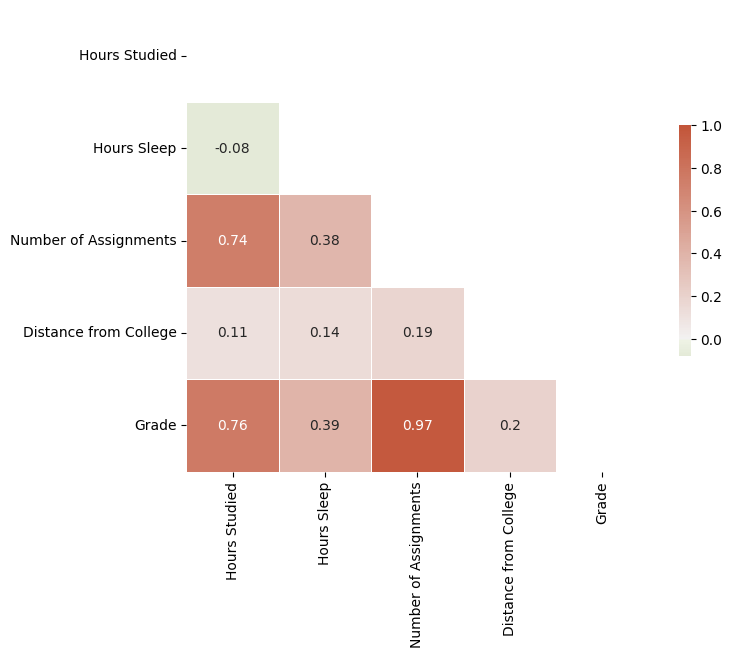

In [30]:
# Set up the heatmap of the correlation matrix to visualize the data
import seaborn as sns

mask = np.triu(np.ones_like(corr, dtype=bool))

cmap = sns.diverging_palette(100, 20, as_cmap=True)

f, ax = plt.subplots(figsize=(8, 6))

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,square=True,
            linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

Look at the bottom row 'Grade' and notice which features correlate


Now we split our data into feature maps and the target output (features and labels)

In [31]:
X = data[['Hours Studied', 'Hours Sleep', 'Number of Assignments', 'Distance from College']]
y = data['Grade']

Create a Train / Test split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Now we can train our model on our training datasets

In [35]:
import statsmodels.api as sm

# Add a constant to the X_train
sm_X_train = sm.add_constant(X_train)

# Create a model
sm_model = sm.OLS(y_train, sm_X_train)

# Fit the model
results = sm_model.fit()

# Print out the statistics
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                  Grade   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     4179.
Date:                Wed, 14 Jun 2023   Prob (F-statistic):               0.00
Time:                        12:30:28   Log-Likelihood:                -2314.3
No. Observations:                 800   AIC:                             4639.
Df Residuals:                     795   BIC:                             4662.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -8.04

In [33]:
model = LinearRegression() # create an instance of LinearRegression class
model.fit(X_train, y_train)

LinearRegression()

Inspect the feature co-efficients

In [34]:
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Hours Studied,0.571222
Hours Sleep,0.154067
Number of Assignments,8.132429
Distance from College,0.082505


Run the test data through the model and make a prediction - we will then compare our predictions to the actual grades in the test set to evaluate model performance

In [38]:
# a unit increase in assignments done brings an increase in the grade by factor
unit = coeff_df.loc['Number of Assignments', ['Coefficient']]
print(unit)

Coefficient    8.132429
Name: Number of Assignments, dtype: float64


In [36]:
y_pred = model.predict(X_test)

In [37]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
993,65.14,63.588189
859,99.90,97.573433
298,39.67,42.856547
553,86.40,75.860334
672,46.50,46.817601
...,...,...
679,65.33,54.686280
722,57.60,53.038503
215,22.50,23.017998
653,100.00,98.132936


By the looks of it our model is performing pretty good; we'll need to see some formal metrics...

In [39]:
# calculate the r-squared

from sklearn.metrics import r2_score
r2_score = r2_score(y_test, y_pred)


In [40]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-squared:', r2_score)
print()
print('10% of the Mean of Grade:', data['Grade'].mean()*0.1)

Mean Absolute Error: 3.6137370457620817
Mean Squared Error: 20.968519194527907
Root Mean Squared Error: 4.579139569234368
R-squared: 0.9483204285127418

10% of the Mean of Grade: 6.097875


If our RMSE < 10% of the Mean Score for Grades, then we have a good model.

In addition, we can see we have a high R-squared which suggests our model variables explain most of the variability in the grade - but we should be wary of spurrious correlation.

## Time Series Example

The following code is an example of time series forecasting in Python.   You will be using time series analysis in future modules, so you are required to learn this in great depth; however work through the example as it still is an example of a linear model used for prediction.

This example uses a well-known times series dataset - Diabetic Drug Sales in Australia - as it contains several elements typical of time series data such as trend, seasonality and randomness.

This example references the article by [Selva Prabhakaran](https://www.machinelearningplus.com/time-series/time-series-analysis-python/)


In [41]:
from dateutil.parser import parse
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120}) # set figure sizes


In [42]:
# Import Data as Dataframe

df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv',
                 index_col='date',parse_dates=['date'])
df.head()

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869


In [43]:
# Explore our data set

df.describe()

,value
count,204.000000
mean,10.694430
std,5.956998
min,2.814520
25%,5.844095
50%,9.319345
75%,14.289964
max,29.665356


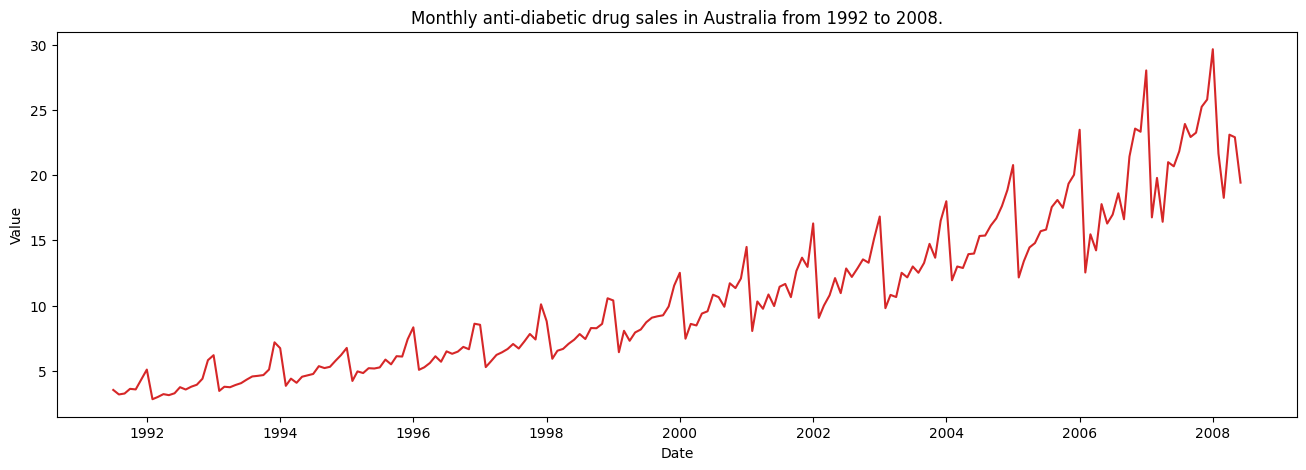

In [44]:
# Visualise the data

def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(df, x=df.index, y=df.value, title='Monthly anti-diabetic drug sales in Australia from 1992 to 2008.')

The seasonality in the data is very clear - a sharp fall in drug sales every February, rising again in March, falling again in April etc. This pattern repeats every year - so if we were planning resource allocation we would need to take this into account.

Notice there is also a trend in the data - drug sales are increasing from one year to the next.

One visualisation technique is the use of the [boxplot](https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51) - which capture the level of the data as well as the distribution of the data for each period (each year in this case).

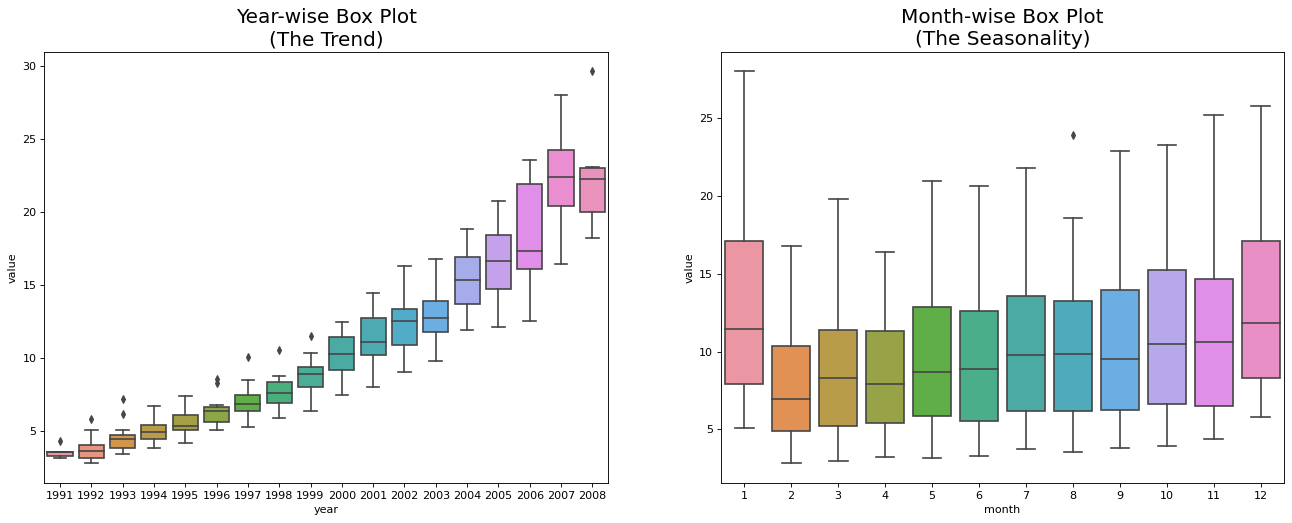

In [45]:
# Extract the year and month from the index

df['year'] = df.index.year
df['month'] = df.index.month
years = df['year'].unique()

# Create the plot

fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='value', data=df, ax=axes[0])
sns.boxplot(x='month', y='value', data=df.loc[~df.year.isin([1991, 2008]), :])

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18);
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()

The boxplots clearly show the annual and monthly distributions of the data. We can see that December and January have higher drug sales.



A time series is split into:
* Base Level
* Trend
* Seasonality
* Error (which random and we can't predict)

A trend is observed when there is an increasing or decreasing slope in the time series.

Seasonality is a distinct repeating pattern between regular intervals.

Not all time series must have trend and/or seasonality.

The visuals below illustrate the compositional nature of time series...



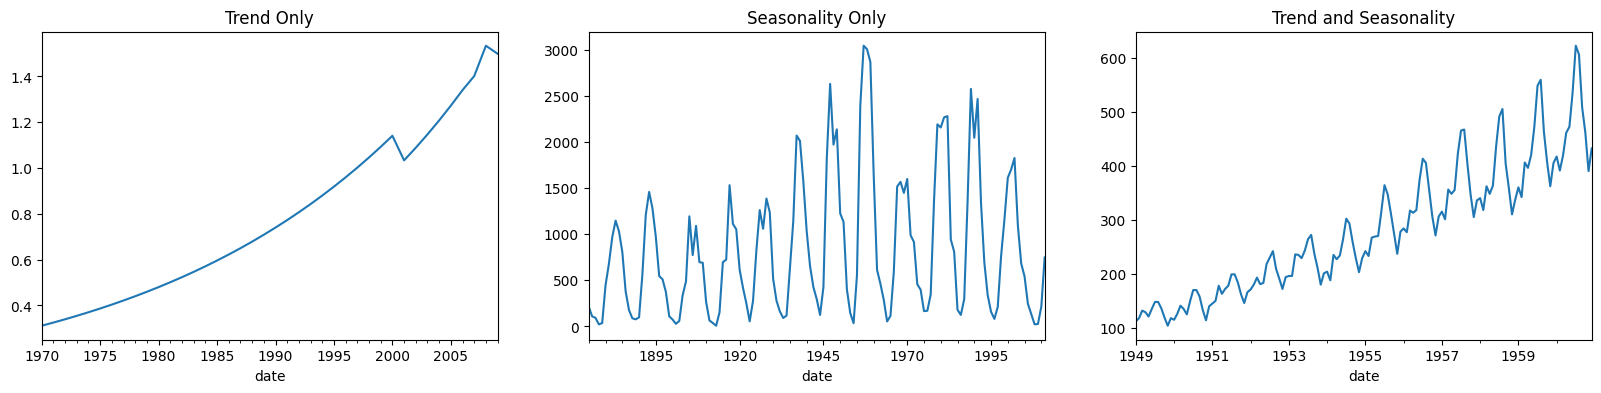

In [46]:
fig, axes = plt.subplots(1,3, figsize=(20,4), dpi=100)
pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/guinearice.csv', parse_dates=['date'], index_col='date').plot(title='Trend Only', legend=False, ax=axes[0])

pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/sunspotarea.csv', parse_dates=['date'], index_col='date').plot(title='Seasonality Only', legend=False, ax=axes[1])

pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/AirPassengers.csv', parse_dates=['date'], index_col='date').plot(title='Trend and Seasonality', legend=False, ax=axes[2]);

A time series may also be cyclic.

The data shows a repetitive pattern but in regular, fixed intervals.

'Cyclic’ effects, such as economic growth, are not ‘seasonal’, such as ice cream sales in summer.

As part of your exploratory data analysis it is a good idea to 'decompose' your times series into trend, seasonal and residual (error) components.

We do this by working out the trend - in annual data this is usually the 12-month moving average - and subtracting that from the data values.

This leaves the seasonal and residual components - we then calculate the seasonal component (too complex for this notebook) and remove that to leave the remaining unexplained element of the data - the error / residual.

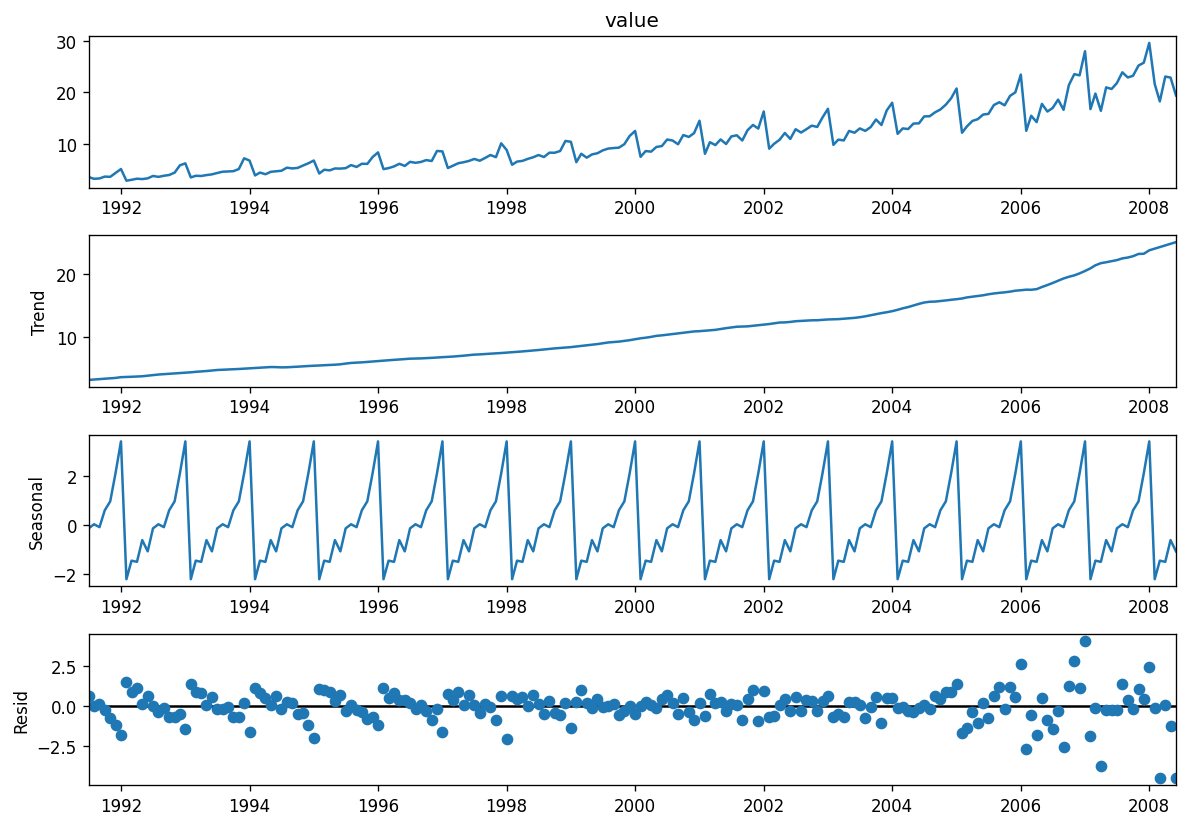

In [47]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

# Additive Decomposition
result_add = seasonal_decompose(df['value'], model='additive', extrapolate_trend='freq')

# Plot
result_add.plot()
plt.show()

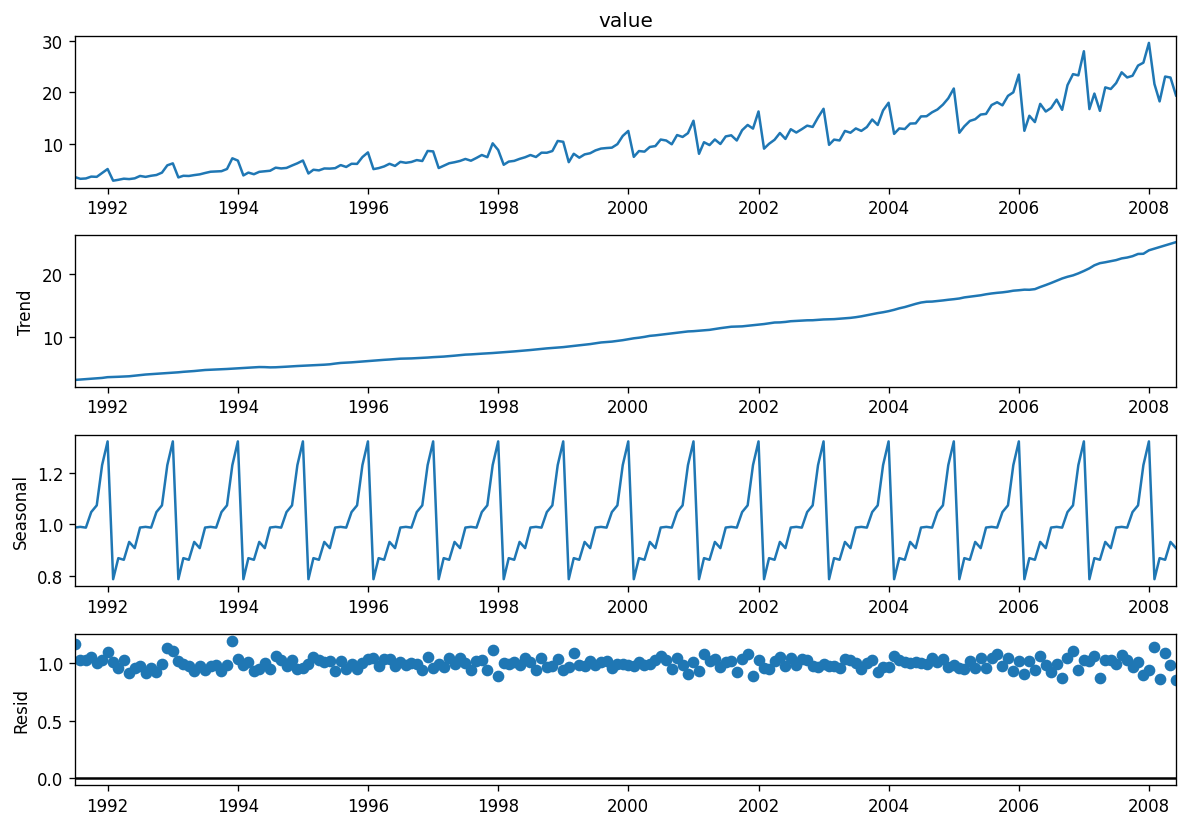

In [48]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

# Additive Decomposition
result_add = seasonal_decompose(df['value'], model='multi', extrapolate_trend='freq')

# Plot
result_add.plot()
plt.show()

In [ ]:
df_reconstructed = pd.concat([result_add.seasonal, result_add.trend, result_add.resid, result_add.observed], axis=1)
df_reconstructed.columns = ['seas', 'trend', 'resid', 'actual_values']
df_reconstructed.head()

,seas,trend,resid,actual_values
date,,,,
1991-07-01,-0.140765,3.060085,0.607271,3.526591
1991-08-01,0.027747,3.124765,0.028379,3.180891
1991-09-01,-0.090361,3.189445,0.153137,3.252221
1991-10-01,0.602876,3.254125,-0.245998,3.611003
1991-11-01,0.970698,3.318805,-0.723634,3.565869


If we add up the trend + seasonality + residual = actual observed value

[**Stationarity**](https://otexts.com/fpp3/stationarity.html) is an import property of a time series.

A stationary series mean the values of the series is not a function of time - that means they do not increase or decrease in time.

In order to model any data we need to know basic statistical properties of the data - the mean and variance - and these must be stable.  If they increase or decrease through time, we can't make meaningful inferences about the data (we can but it is a lot more complicated).

The correlation of a series with its previous values - autocorrelation - must also remain constant over time.

To make a time series stationary we need to transform it into a series with a constant mean, constant variance, no seasonality or trend.  We can then model it and make predictions before transforming it back to give us a meaningful prediction.

In the chart below we can see a time series that is NOT stationary - there is an obvious upwards trend, and the variance is getting wider through the passage of time.  There is also obvious seasonality in the data.


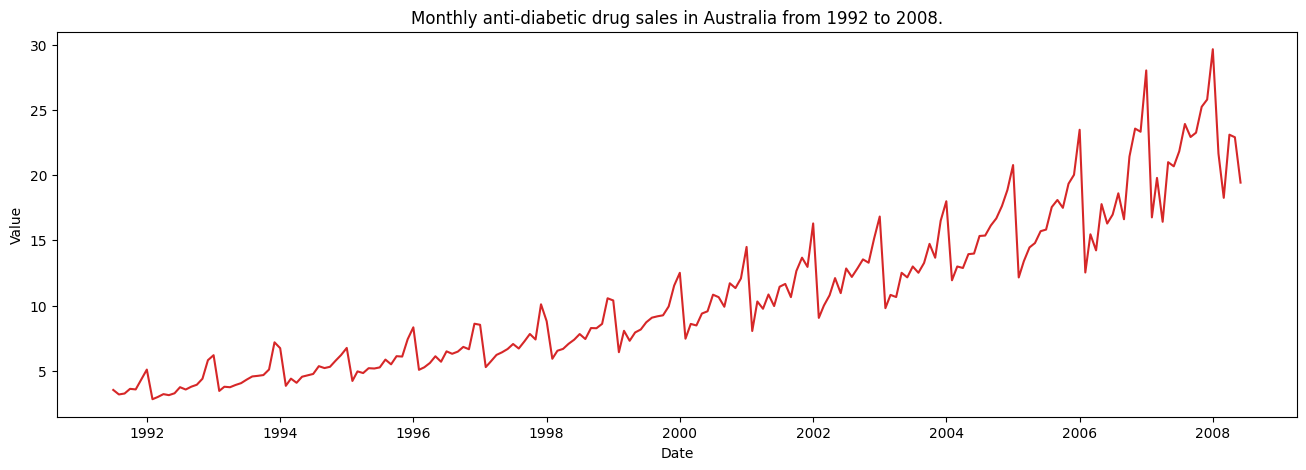

In [49]:
plot_df(df, x=df.index, y=df.value, title='Monthly anti-diabetic drug sales in Australia from 1992 to 2008.')

We can transform this series into a stationary series by differencing the data - that means simply subtracting the previous value from the current value - so we are just left with the difference.

Forecasting a stationary series is more reliable - remember autoregressive forecasting models are linear regression models of themselves.

Linear regression works best if the predictors (X variables) are not correlated against each other. A stationary series removes the autocorrelation between the inputs (features in ML) and transforms them into independent inputs.


An example of a time series forecast model




In [52]:
from statsmodels.tsa.arima.model import ARIMA

# 3,1,2 ARIMA Model
model = ARIMA(df.value, order=(3,1,2))
model_fit = model.fit()
print(model_fit.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                  204
Model:                 ARIMA(3, 1, 2)   Log Likelihood                -418.961
Date:                Wed, 14 Jun 2023   AIC                            849.922
Time:                        13:01:45   BIC                            869.801
Sample:                    07-01-1991   HQIC                           857.964
                         - 06-01-2008                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6302      0.101     -6.223      0.000      -0.829      -0.432
ar.L2          0.3444      0.147      2.339      0.019       0.056       0.633
ar.L3         -0.0220      0.100     -0.219      0.8

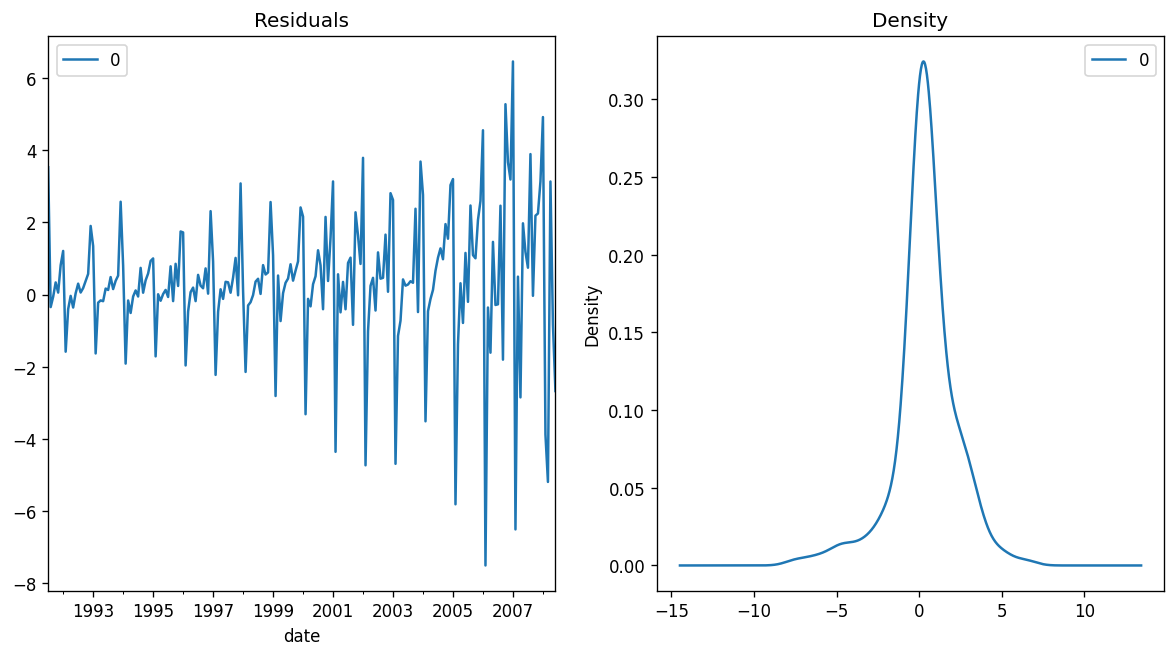

In [53]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1, 2, figsize=(12,6))
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()


We expect our residuals - the error terms which we can't model becuase they are random, to be ditributed around a mean of zero

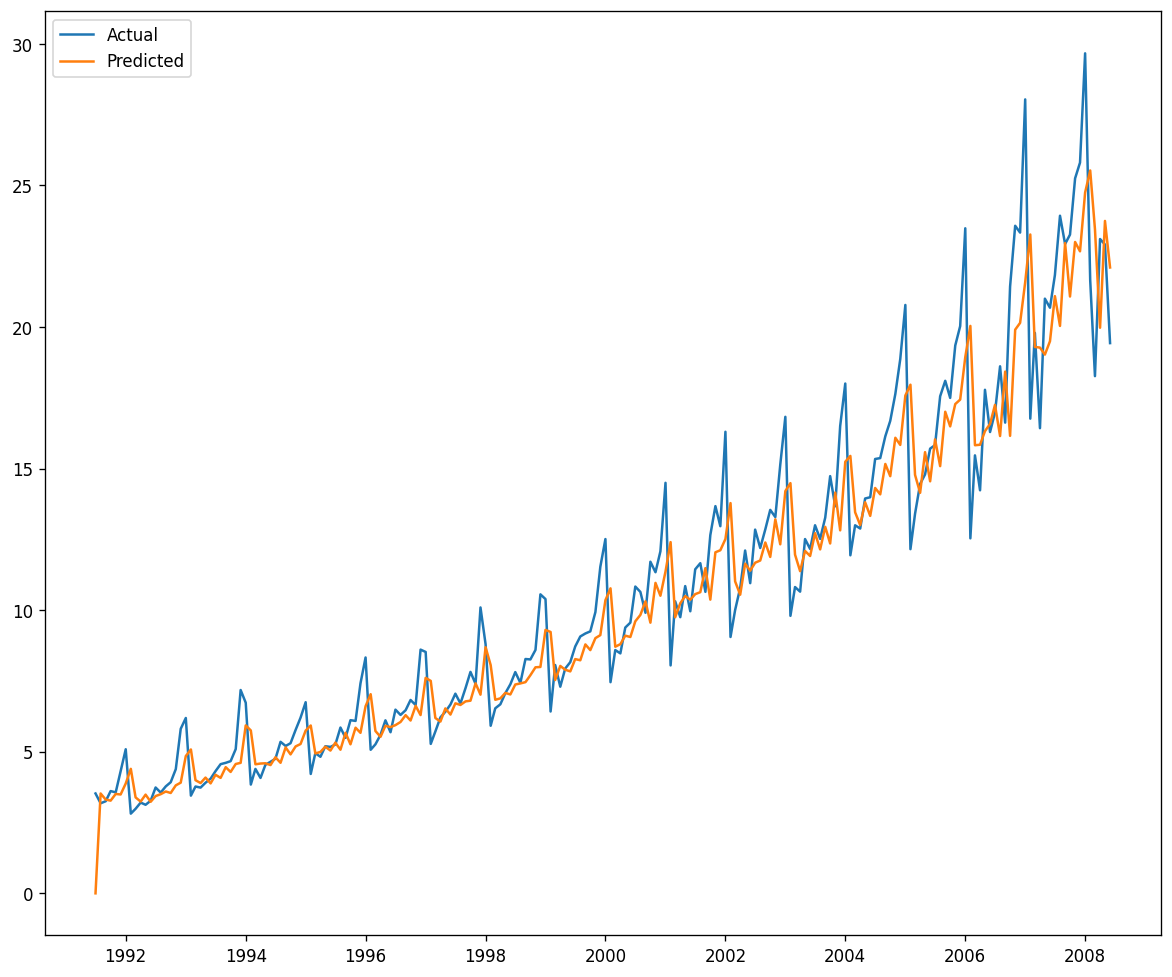

In [55]:
import matplotlib.pyplot as plt

# Get predictions
pred = model_fit.get_prediction(dynamic=False)

# Plot actual vs predicted values
plt.figure(figsize=(12,10))
plt.plot(df.value, label='Actual')
plt.plot(pred.predicted_mean, label='Predicted')
plt.legend()
plt.show()

In [56]:
# Create Training and Test
train = df.value[:189]
test = df.value[189:]

# we are only going to forecast using 15 instances of the series to set len(test) = 15

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


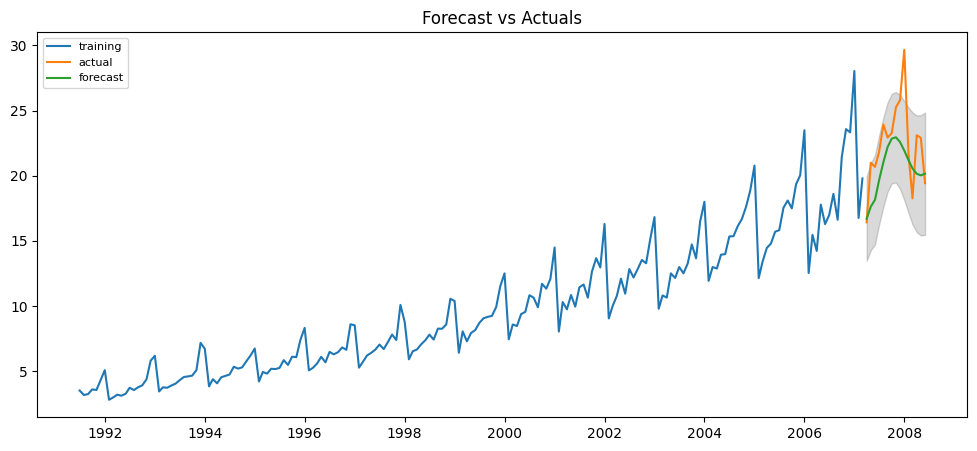

In [58]:
# Build Model
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import pandas as pd

model = ARIMA(train, order=(3, 1, 2))

fitted = model.fit()

# Forecast
forecast = fitted.get_forecast(steps=len(test))
fc = forecast.predicted_mean
conf = forecast.conf_int(alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf.iloc[:, 0], index=test.index)
upper_series = pd.Series(conf.iloc[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series,
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()


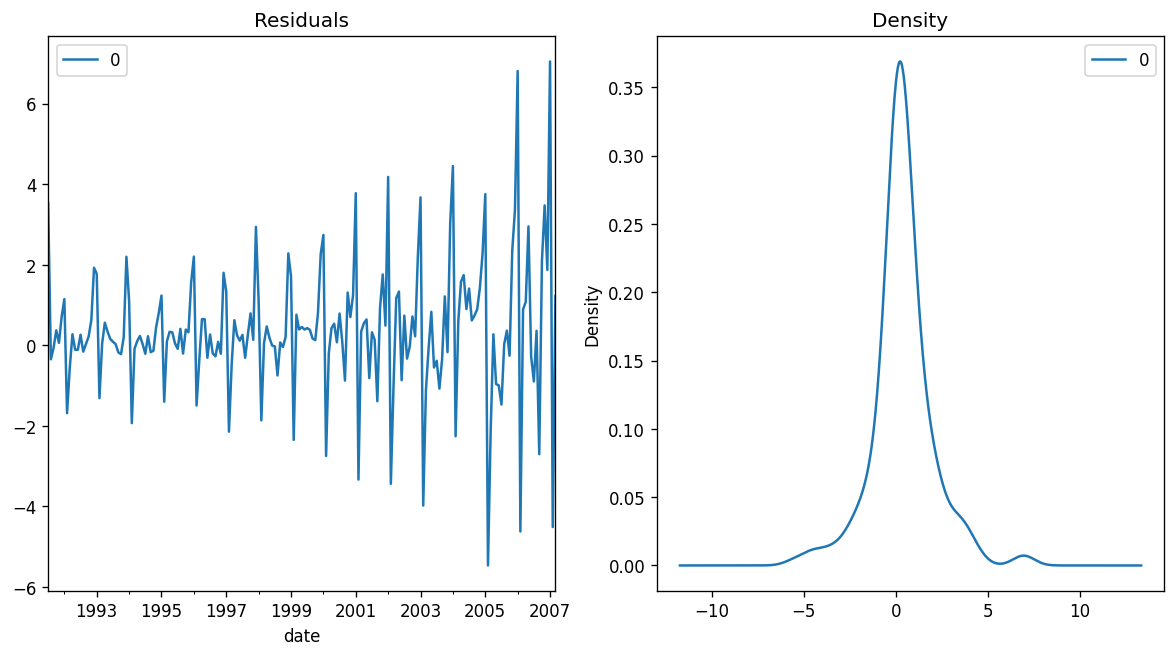

In [59]:
# Plot residual errors
residuals = pd.DataFrame(fitted.resid)
fig, ax = plt.subplots(1, 2, figsize=(12,6))
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

And we can generate the typical evaluation metrics

In [60]:
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None],
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None],
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax

    return({'mape':mape, 'me':me, 'mae': mae,
            'mpe': mpe, 'rmse':rmse,
            'corr':corr, 'minmax':minmax})

forecast_accuracy(fc, test.values)


<ipython-input-60-e477e58565b5>:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  mins = np.amin(np.hstack([forecast[:,None],
<ipython-input-60-e477e58565b5>:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  maxs = np.amax(np.hstack([forecast[:,None],


{'mape': 0.09892234915988667,
 'me': -1.8898064505714471,
 'mae': 2.3299838528090766,
 'mpe': -0.07491566752700982,
 'rmse': 2.9446532294713093,
 'corr': 0.691565139208399,
 'minmax': 0.09787931728415666}

# SARIMA


The seasonal ARIMA model incorporates both non-seasonal and seasonal factors in a multiplicative model. One shorthand notation for the model is:  **ARIMA(p,d,q)×(P,D,Q)S**  with with  **p  = non-seasonal AR order**,  **d  = non-seasonal differencing**,  **q  = non-seasonal MA order**,  **P  = seasonal AR order**,  **D  = seasonal differencing**,  **Q  = seasonal MA order**, and  **S  = time** span of repeating seasonal pattern.


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


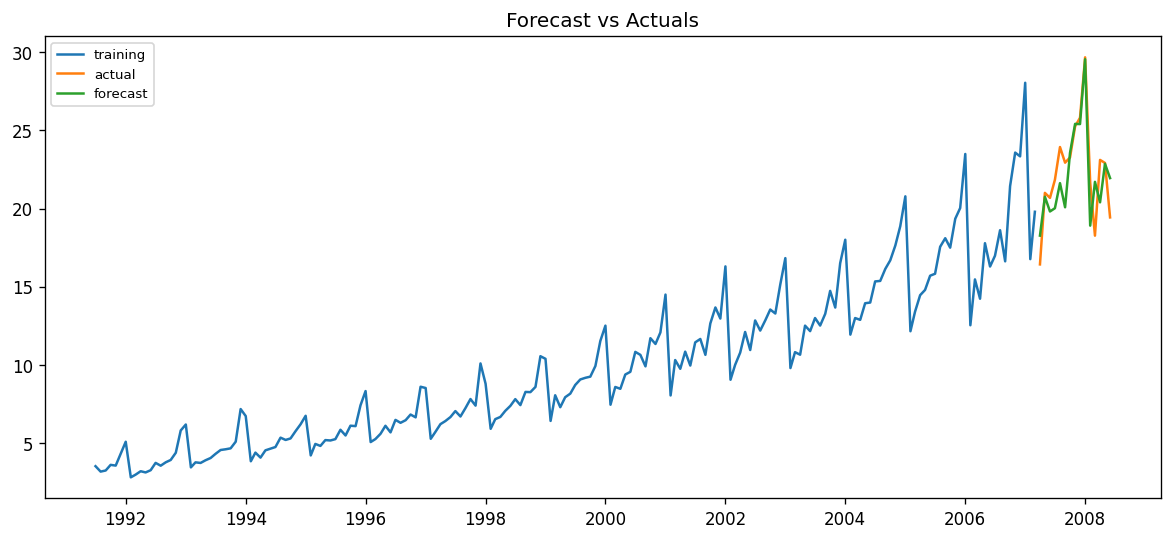

In [61]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# This model lags on 3 past values (p=3) for the AutoRegression,
# Difference times series for trend (d=1), and
# two lags on errors for MovingAverage (q=2)
# It also includes a seasonal component with a period of 12 (m=12)
# taking account of one previous season's value (P=1),
# with no differencing (D=0), and
# two lags on errors for MovingAverage (Q=1)
model = SARIMAX(train, order=(3,1,2), seasonal_order=(1,0,1,12))

fitted = model.fit()

# Forecast
fc = fitted.forecast(len(test))

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)

# Plot
plt.figure(figsize=(12,5))
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

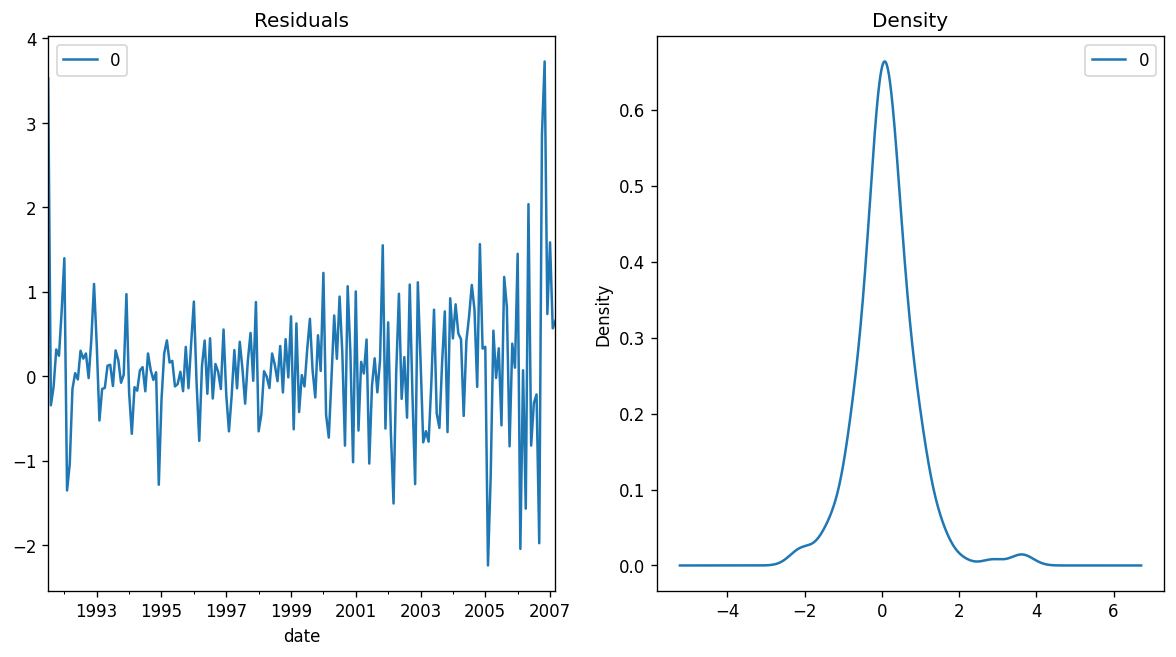

In [62]:

# Plot residual errors
residuals = pd.DataFrame(fitted.resid)
fig, ax = plt.subplots(1, 2, figsize=(12,6))
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

In [63]:
forecast_accuracy(fc, test.values)

<ipython-input-60-e477e58565b5>:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  mins = np.amin(np.hstack([forecast[:,None],
<ipython-input-60-e477e58565b5>:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  maxs = np.amax(np.hstack([forecast[:,None],


{'mape': 0.07153523427533166,
 'me': -0.39324356308532155,
 'mae': 1.4922471917780475,
 'mpe': -0.011742076938920248,
 'rmse': 1.9028981714600346,
 'corr': 0.8080218571302425,
 'minmax': 0.06779345900072042}

## Determining p, d, q and P, D, Q

Determining the right order (p, d, q) for ARIMA or SARIMA models (including the seasonal order P, D, Q, m) is typically done through a combination of statistical tests and diagnostic plots. Here's a step-by-step guide from Rob Hynman:


When fitting an ARIMA model to a set of (non-seasonal) time series data, the following procedure provides a useful general approach.

1. Plot the data and identify any unusual observations.
2. If necessary, transform the data (using a Box-Cox transformation) to stabilise the variance.
3. If the data are non-stationary, take first differences of the data until the data are stationary.
4. Examine the ACF/PACF: Is an ARIMA( p,d,0) or ARIMA( 0,d,q) model appropriate?
5. Try your chosen model(s), and use the AICc to search for a better model.
6. Check the residuals from your chosen model by plotting the ACF of the residuals, and doing a portmanteau test of the residuals. If they do not look like white noise, try a modified model.
7. Once the residuals look like white noise, calculate forecasts.

> 🔑 https://otexts.com/fpp3/arima-r.html#modelling-procedure

![image](https://otexts.com/fpp3/figs/arimaflowchart.png)

1. Plot the data and identify any unusual observations.

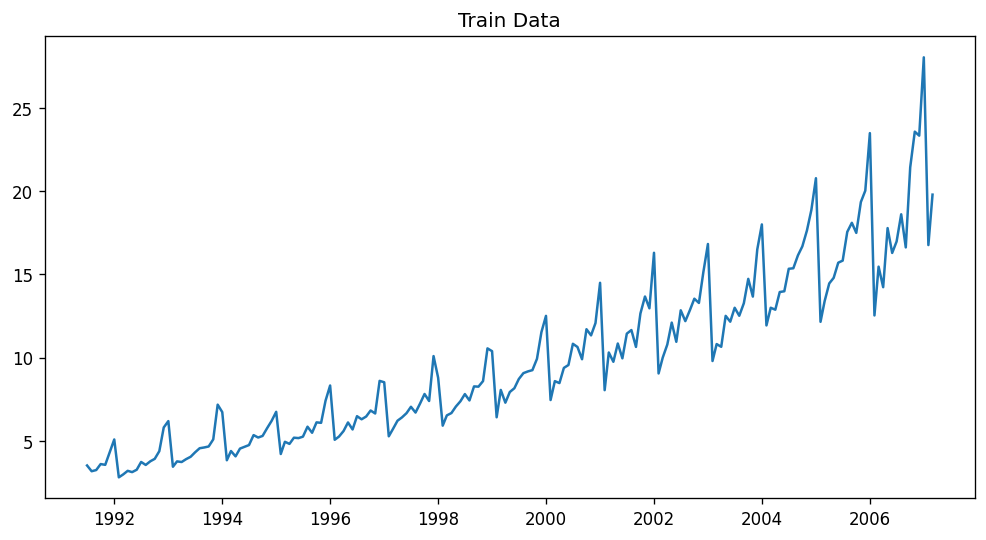

In [65]:
plt.figure(figsize=(10, 5))
plt.plot(train)
plt.title('Train Data')
plt.show()


2. If necessary, transform the data (using a Box-Cox transformation) to stabilise the variance.



Optimal lambda value: 0.08373659078105285


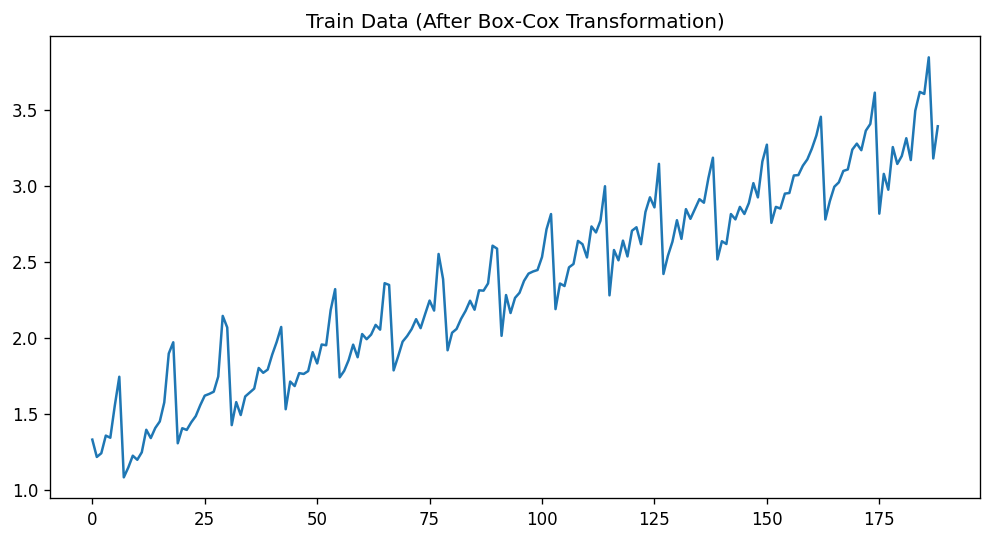

In [66]:
from scipy.stats import boxcox

# Apply Box-Cox Transformation
train_boxcox, lambda_val = boxcox(train)

# Print lambda value
print('Optimal lambda value:', lambda_val)

# Plot the transformed data
plt.figure(figsize=(10,5))
plt.plot(train_boxcox)
plt.title('Train Data (After Box-Cox Transformation)')
plt.show()



3. If the data are non-stationary, take first differences of the data until the data are stationary.

In [67]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(train_boxcox)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -0.498161
p-value: 0.892375


If the p-value is above a critical size (like 0.05), we can't reject the null hypothesis that the series is non-stationary, and we need to use differencing (d > 0 or D > 0).


In [68]:
if result[1] > 0.05:
    train_boxcox_series = pd.Series(train_boxcox, index=train.index)
    train_boxcox_diff = train_boxcox_series.diff().dropna()

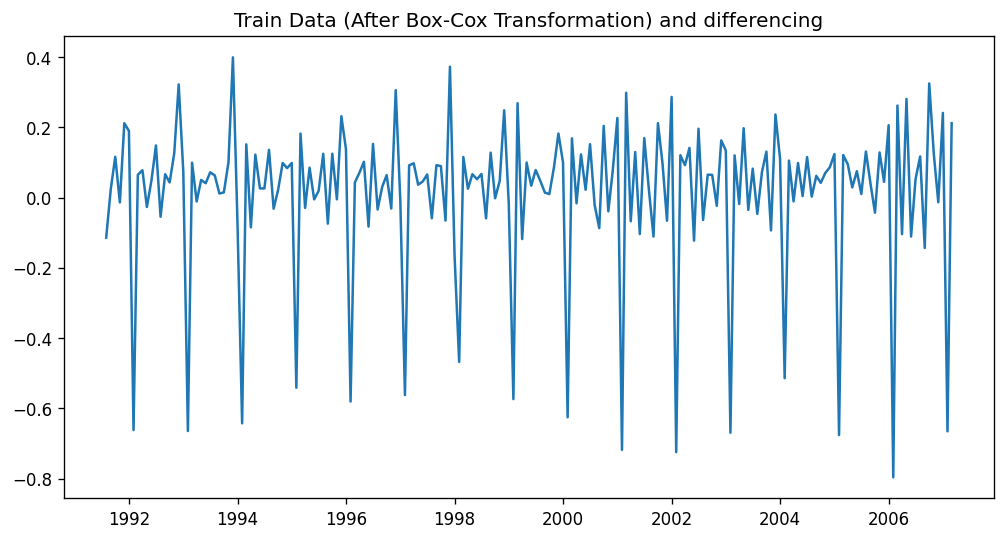

In [69]:

# Plot the transformed data
plt.figure(figsize=(10,5))
plt.plot(train_boxcox_diff)
plt.title('Train Data (After Box-Cox Transformation) and differencing')
plt.show()


In [70]:
# Perform seasonal differencing
train_boxcox_diff_seasonal = train_boxcox_diff - train_boxcox_diff.shift(12)

# Drop missing values
train_boxcox_diff_seasonal = train_boxcox_diff_seasonal.dropna()

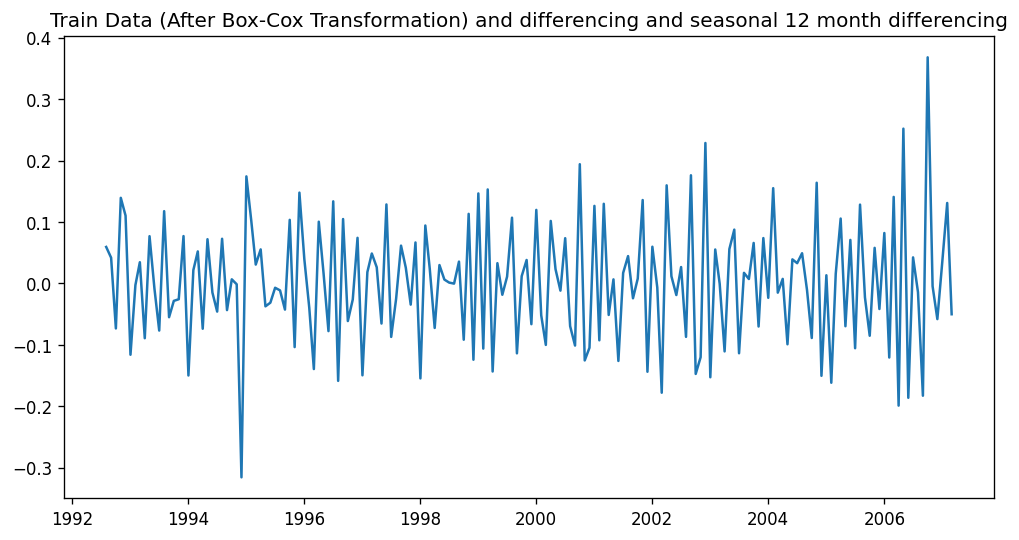

In [71]:
# Plot the transformed data
plt.figure(figsize=(10,5))
plt.plot(train_boxcox_diff_seasonal)
plt.title('Train Data (After Box-Cox Transformation) and differencing and seasonal 12 month differencing')
plt.show()

In [72]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(train_boxcox_diff_seasonal)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -6.928002
p-value: 0.000000








4. Examine the ACF/PACF: Is an ARIMA( p,d,0) or ARIMA( 0,d,q) model appropriate?

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


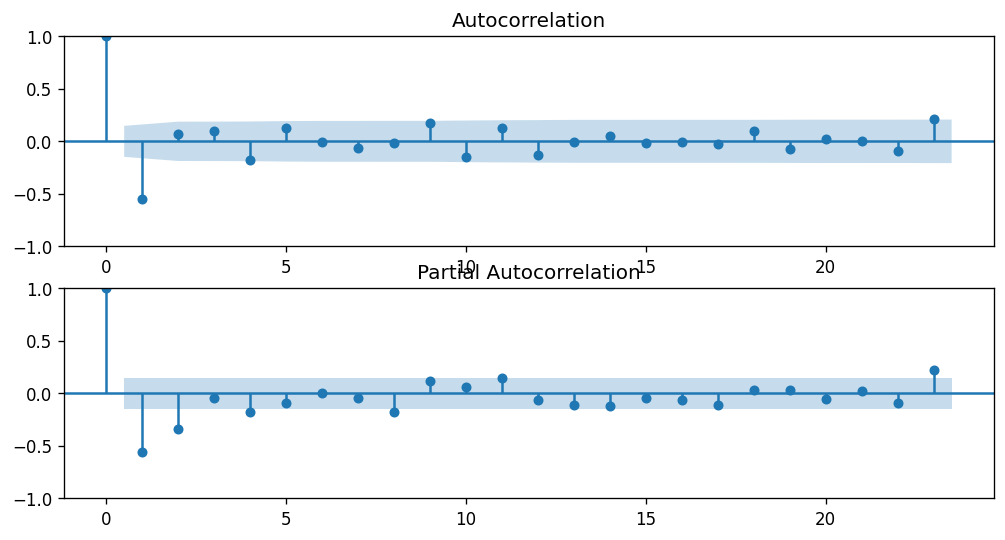

In [73]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(2, figsize=(10,5))
plot_acf(train_boxcox_diff_seasonal, ax=ax[0])
plot_pacf(train_boxcox_diff_seasonal, ax=ax[1])
plt.show()






5. Try your chosen model(s), and use the AICc to search for a better model.



In [74]:
# Build Model
model = SARIMAX(train_boxcox, order=(2, 1, 1), seasonal_order=(1, 0, 1, 12))

fitted = model.fit()
fitted.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  189
Model:             SARIMAX(2, 1, 1)x(1, 0, 1, 12)   Log Likelihood                 218.934
Date:                            Wed, 14 Jun 2023   AIC                           -425.868
Time:                                    13:25:51   BIC                           -406.450
Sample:                                         0   HQIC                          -418.001
                                            - 189                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0560      0.125     -0.448      0.654      -0.301       0.189
ar.L2          0.1068      0.120      0.888      0.374      -0.129       0.342
ma.L1         -0.7922      0.103     -7.724      0.000      -0.993      -0.591
ar.S.L12       0.9967      0.002    445.860      0.000       0.992       1.001
ma.S.L12      -0.7553      0.068    -11.138      0.000      -0.888      -0.622
sigma2         0.0047      0.000     10.344      0.000       0.004       0.006
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                 3.24
Prob(Q):                              0.79   Prob(JB):                         0.20
Heteroskedasticity (H):               1.13   Skew:                            -0.13
Prob(H) (two-sided):                  0.63   Kurtosis:                         3.59
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

6. Check the residuals from your chosen model by plotting the ACF of the residuals, and doing a portmanteau test of the residuals. If they do not look like white noise, try a modified model.


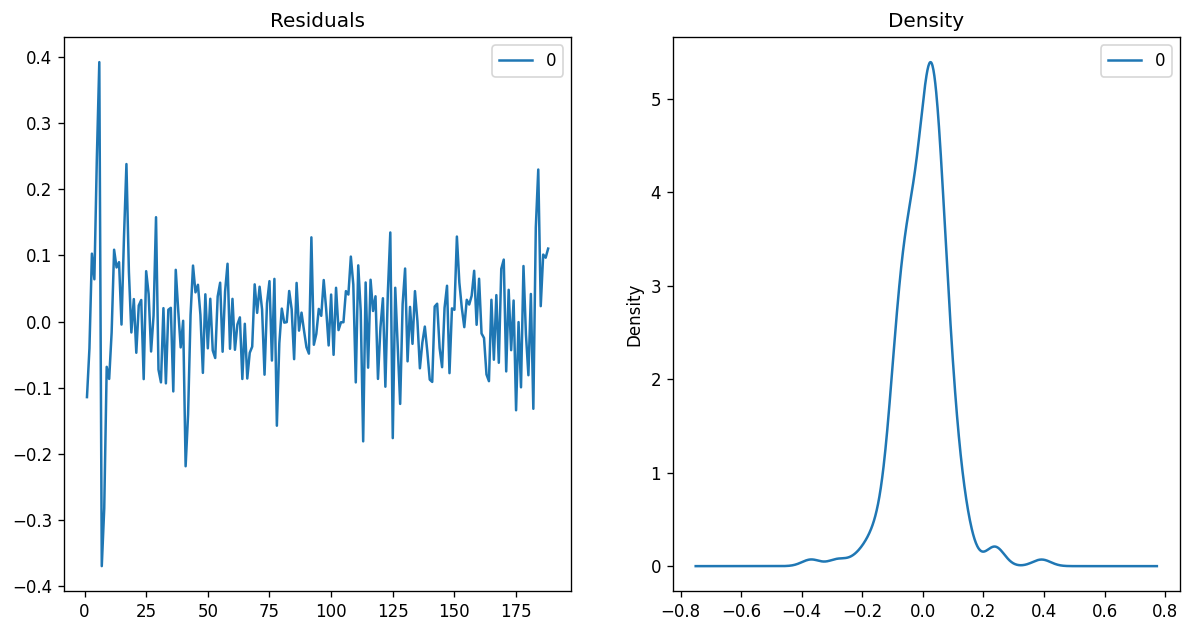

In [76]:
# Calculate residuals
residuals = pd.DataFrame(fitted.resid)

# Remove first residual
burn_in = 1
residuals = residuals.iloc[burn_in:]

# Plot
fig, ax = plt.subplots(1, 2, figsize=(12,6))
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()



7. Once the residuals look like white noise, calculate forecasts.


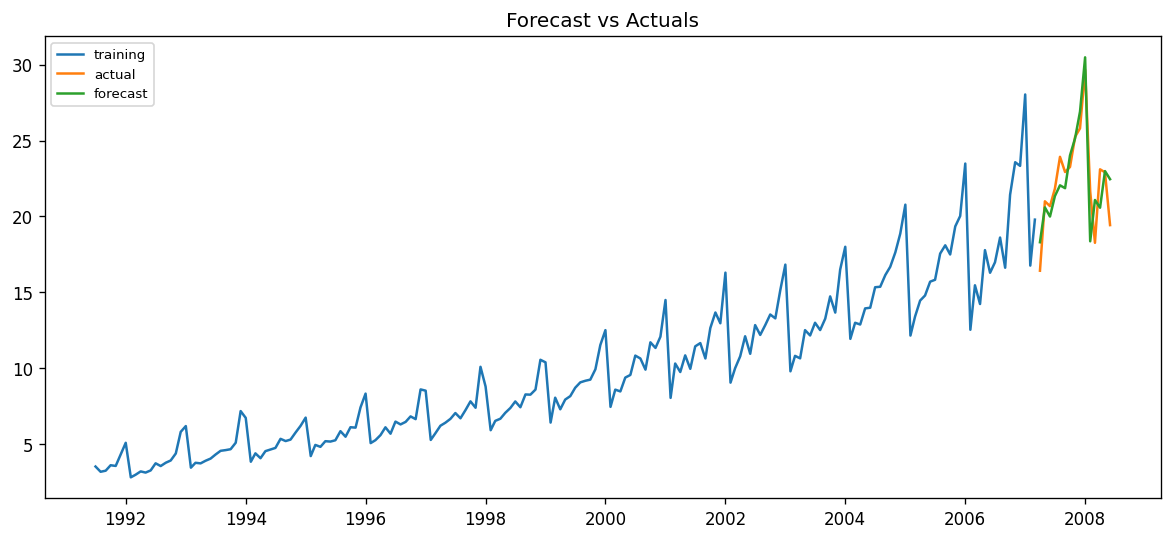

In [77]:
from scipy.special import inv_boxcox

# Forecast
fc_boxcox = fitted.forecast(len(test))

# Inverse the Box-Cox transformation
fc = inv_boxcox(fc_boxcox, lambda_val)

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)

# Inverse Box-Cox transformation on train data
train_invboxcox = pd.Series(inv_boxcox(train_boxcox, lambda_val), index=train.index)

# Plot
plt.figure(figsize=(12,5))
plt.plot(train_invboxcox, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [78]:
forecast_accuracy(fc, test.values)

{'mape': 0.06638855213559469,
 'me': 0.004046096325631746,
 'mae': 1.3948479019753062,
 'mpe': 0.0044358608754853255,
 'rmse': 1.7490196629647472,
 'corr': 0.8412175859067069,
 'minmax': 0.06259259471312362}


Now that we have specified our model using train and evaluating with test, we would go on to rebuild the model on the entire time series and forecast into the future...
> 🔑 https://robjhyndman.com/hyndsight/python_time_series.html

[SARIMA explained](https://towardsdatascience.com/time-series-data-analysis-with-sarima-and-dash-f4199c3fc092)